In [1]:
import os
os.chdir('..')
from notebooks import config
import matplotlib.pyplot as plt
from utils.geotif_io import readTiff
import numpy as np
from utils.imgShow import imgShow

In [2]:
path_srtm_c = config.root_proj + '/data/dem/srtm-c/SRTMGL1_wkunlun_wgs84V.tif'
path_srtm_x = config.root_proj + '/data/dem/srtm-x/srtm_x.tif'
path_tandem = config.root_proj + '/data/dem/tandem-x/tandem_masked_mosaic_wkunlun_resize.tif'
path_img = config.root_proj + '/data/rsimg/l8_kunlun_20200914.tif'



### Coords system transformation

In [32]:
### 1. utm projection to wgs84
# !gdalwarp -t_srs EPSG:4326 /Users/luo/OneDrive/GitHub/Glacier-in-RGI1305/data/rsimg/l8_kunlun_20200914.tif /Users/luo/OneDrive/GitHub/Glacier-in-RGI1305/data/rsimg/l8_kunlun_20200914_wgs84.tif

### 2. wgs84 to wgs84/egm2008
# !gdalwarp  -s_srs "+proj=longlat +datum=WGS84 +no_def" -t_srs "+proj=longlat +datum=WGS84 +no_defs +geoidgrids=egm08_25.gtx" data/dem/TanDem90_StudyArea_resize_resam.tif data/dem/TanDem90_StudyArea_resize_resam_egm2008.tif
# !gdalwarp  -s_srs "+proj=longlat +datum=WGS84 +no_def" -t_srs "+proj=longlat +datum=WGS84 +no_defs +geoidgrids=egm08_25.gtx" data/dem/SRTM_X_DEM.tif data/dem/SRTM_X_egm2008.tif

# !gdalwarp -overwrite -s_srs EPSG:4326 -t_srs EPSG:4326+3855 data/dem/SRTM_X_DEM.tif data/dem/SRTM_X_egm2008.tif
### 3. wgs84/egm96 to egm2008
# !gdalwarp  -s_srs "+proj=longlat +datum=WGS84 +geoidgrids=egm96_15.gtx" -t_srs "+proj=longlat +datum=WGS84 +no_defs +geoidgrids=egm08_25.gtx" data/dem/SRTMGL1_StudyArea.tif data/dem/SRTMGL1_StudyArea_egm2008.tif

### 4. wgs84/egm96 to wgs84
# !gdalwarp  -s_srs "+proj=longlat +datum=WGS84 +geoidgrids=egm96_15.gtx" -t_srs "+proj=longlat +datum=WGS84 +no_defs" data/dem/SRTMGL1_StudyArea.tif data/dem/SRTMGL1_StudyArea_HeightWGS84.tif


In [4]:
img_srtm_c, img_srtm_c_info = readTiff(path_srtm_c)
img_srtm_x, img_srtm_x_info = readTiff(path_srtm_x)
img_tandem, img_tandem_info = readTiff(path_tandem)
rs_img, rs_img_info = readTiff(path_img)
print('tandem shape:', img_tandem.shape)
print('rstm shape:', img_srtm_c.shape)
print('rstm_x shape:', img_srtm_x.shape)


tandem shape: (3401, 6562)
rstm shape: (3401, 6562)
rstm_x shape: (3401, 6562)


Text(0.5, 1.0, 'tandem')

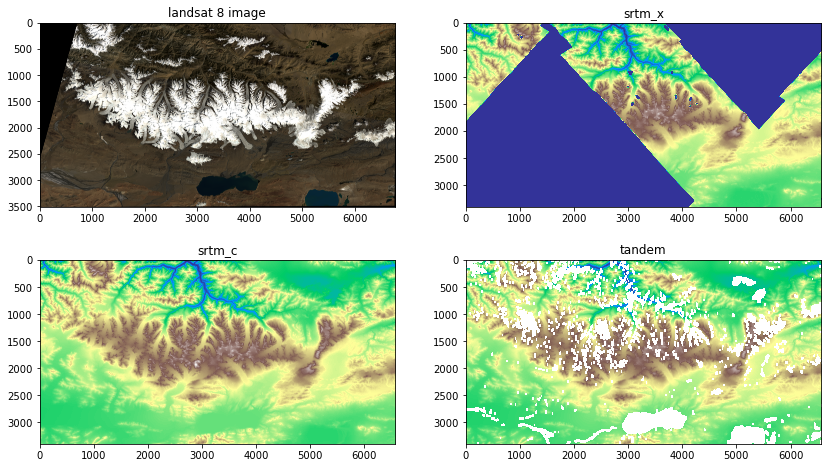

In [5]:
plt.figure(figsize=(14,8))

plt.subplot(2,2,1)
imgShow(rs_img, color_bands=(2, 1, 0), clip_percent=5)
plt.title('landsat 8 image')
plt.subplot(2,2,2)
plt.imshow(img_srtm_x, vmin=4000, vmax=7000, cmap='terrain')
plt.title('srtm_x')
plt.subplot(2,2,3)
plt.imshow(img_srtm_c, vmin=4000, vmax=7000, cmap='terrain')
plt.title('srtm_c')
plt.subplot(2,2,4)
plt.imshow(img_tandem, vmin=4000, vmax=7000, cmap='terrain')
plt.title('tandem')
# plt.colorbar(fraction=0.0320, pad=0.02, label='Elevation (m)')


In [14]:
dif_dem_1 = img_srtm_c - img_tandem
dif_dem_2 = img_srtm_x - img_tandem


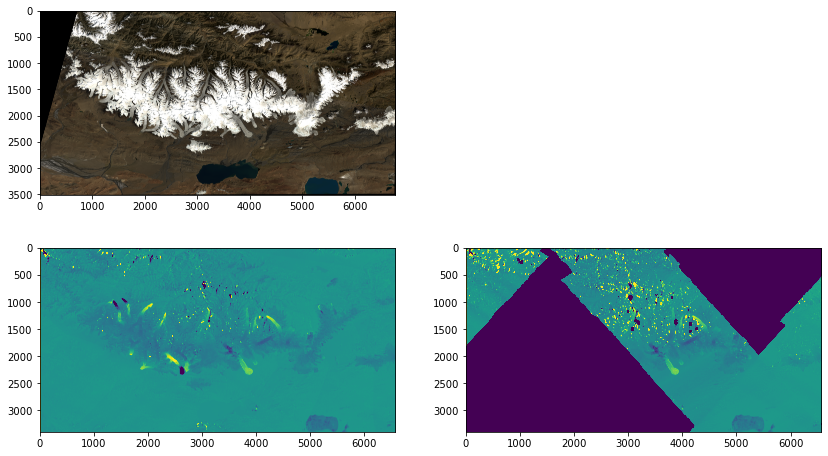

In [15]:
plt.figure(figsize=(14,8))
plt.subplot(221)
# imgShow(rs_img[1500:2500,2000:3000], color_bands=(2, 1, 0), clip_percent=5)
imgShow(rs_img, color_bands=(2, 1, 0), clip_percent=5)

plt.subplot(223)
# plt.imshow(dif_dem[1500:2500,2000:3000], vmin=-50, vmax=50)
plt.imshow(dif_dem_1, vmin=-50, vmax=50)

plt.subplot(224)
# plt.imshow(dif_dem[1500:2500,2000:3000], vmin=-50, vmax=50)
plt.imshow(dif_dem_2, vmin=-50, vmax=50)
# plt.colorbar(fraction=0.0320, pad=0.02, label='Elevation (m)')



Text(0.5, 1.0, 'glacier accumulation')

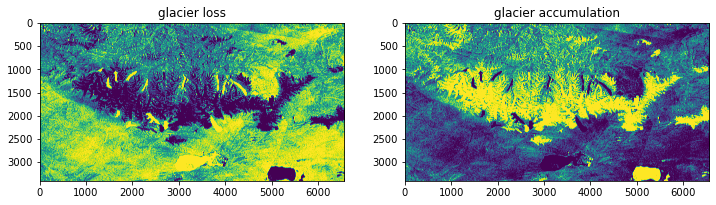

In [16]:
## glacier loss region
dem_loss = dif_dem_1.copy()
dem_loss[dem_loss>0]=1
dem_loss[dem_loss<0]=0
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(dem_loss)
plt.title('glacier loss')
## glacier accumulation region
dem_accum = dif_dem_1.copy()
dem_accum[dem_accum>0]=0
dem_accum[dem_accum<0]=1
plt.subplot(1,2,2)
plt.imshow(dem_accum)
plt.title('glacier accumulation')
